In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#%matplotlib inline
#inline_rc = dict(mpl.rcParams)

In [2]:
os.chdir('D:\\My Documents\\Ryerson\\CIND820++\\yelpds')
cwd = os.getcwd()
print(cwd)

D:\My Documents\Ryerson\CIND820++\yelpds


In [4]:
business_json_path = "yelp_academic_dataset_business.json"
businessDF = pd.read_json(business_json_path, lines=True)

businessDF.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [5]:
businessDF = businessDF[businessDF['is_open']==1]

In [6]:
businessDF = businessDF.drop(columns=["hours", "address", "is_open", "postal_code", "latitude", "longitude"])

businessDF.head()

,business_id,name,city,state,stars,review_count,attributes,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,Portland,OR,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,Portland,OR,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,Orange City,FL,3.0,8,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons"
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,Atlanta,GA,4.0,14,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit..."


In [7]:
businessDF.to_csv("BusinessDF.csv", index=False)

In [3]:
businessCSV = pd.read_csv('BusinessDF.csv')

In [4]:
businessCSV.head()

,business_id,name,city,state,stars,review_count,attributes,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,Portland,OR,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,Portland,OR,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,Orange City,FL,3.0,8,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons"
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,Atlanta,GA,4.0,14,"{'GoodForKids': 'False', 'BusinessParking': ""{...","Gyms, Active Life, Interval Training Gyms, Fit..."


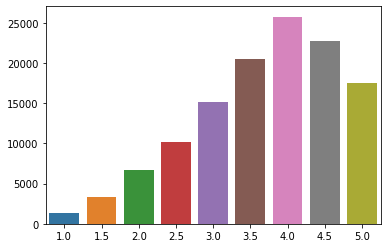

In [11]:
#my own simple bar graph

x = businessCSV['stars'].value_counts()
x = x.sort_index()

sns.barplot(x = x.index, 
            y = x.values)

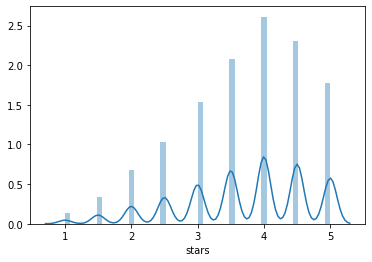

In [12]:
sns.distplot(businessCSV.stars,kde=True,hist=True)

Text(0.5, 0, 'City')

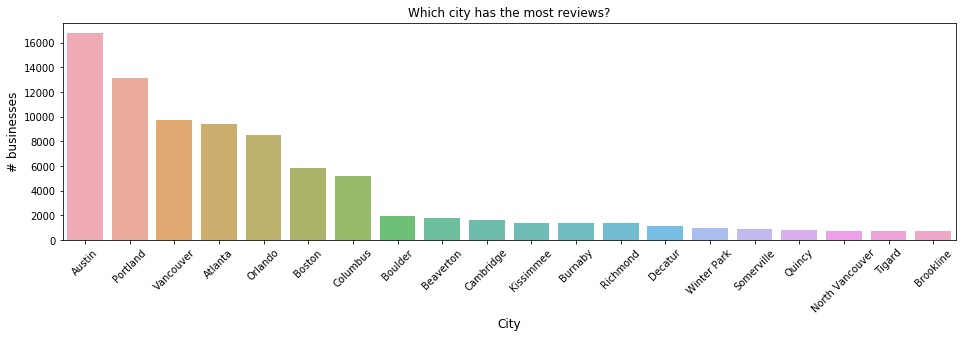

In [13]:
# Bar graph of cities with highest number of reviews. 

x = businessCSV['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)